# Рынок заведений общественного питания Москвы

## Описание проекта
Запланировано открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой.  
Чтобы заинтересовать инвесторов, решено провести исследование рынка, в рамках которго выяснить сможет ли кафе пользоваться популярностю на долгое время.
Решено проанализировать открытые данные о заведениях общественного питания в Москве.

Описание данных:

- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

## Загрузка данных

In [2]:
# импортируем библиотеки
import pandas as pd
from plotly import graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#выгрузим данные по районам города Москвы
moscow_region=pd.read_csv('https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv?sequence=1&isAllowed=y')

In [4]:
# просматриваем данные
data=pd.read_csv('/datasets/rest_data.csv')
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [5]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


### Выводы по загрузке данных

Проанализировав данные пустых значений и дубликатов не выявлено, тип данных совпадает с необходимым

## Анализ данных

In [6]:
# просмотрим виды объектов общественного питания
object_type=pd.pivot_table(data, index='object_type', values='id', aggfunc='count').reset_index()
object_type.rename(columns = {'id' : 'count'}, inplace = True)
object_type['rate']=object_type['count']/15366
object_type.sort_values(by='count', ascending=False)



,object_type,count,rate
3,кафе,6099,0.396915
8,столовая,2587,0.168359
7,ресторан,2285,0.148705
6,предприятие быстрого обслуживания,1923,0.125146
0,бар,856,0.055707
1,буфет,585,0.038071
4,кафетерий,398,0.025901
2,закусочная,360,0.023428
5,магазин (отдел кулинарии),273,0.017766


<AxesSubplot:ylabel='rate'>

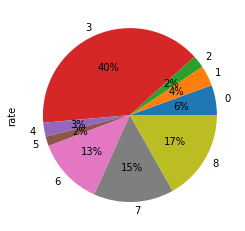

In [7]:
object_type['rate'].plot(kind='pie',  autopct='%1.0f%%')


Самыми популярными видами объектов общественного питания является кафе, за ним столовая, ресторан и предприятие быстрого обслуживания.

In [8]:
# просмотрим сетевые и несетевые объекты общественного питания
chain_type=pd.pivot_table(data, index='chain', values='id', aggfunc='count')
chain_type.rename(columns = {'id' : 'count'}, inplace = True)
chain_type['rate']=chain_type['count']/15366
chain_type.sort_values(by='count', ascending=False)


,count,rate
chain,,
нет,12398,0.806846
да,2968,0.193154


<AxesSubplot:ylabel='rate'>

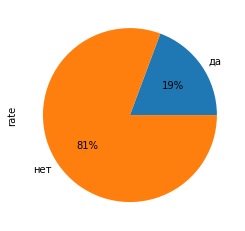

In [9]:
chain_type['rate'].plot(kind='pie',  autopct='%1.0f%%')

Большинство объектов - 81 процент не являются сетевыми

In [10]:
#выберем сетевые объекты
chain_date=data.loc[data['chain']=='да']

#просмотрим количество каждого вида объекта общественного питания в сетевых объектах
chain_date_rate=chain_date.groupby('object_type')['id'].count().reset_index()
chain_date_rate.rename(columns = {'id' : 'count_is_chain'}, inplace = True)
#отсортируем общие цифры по каждому виду объекта по алфавиту
object_type=object_type.sort_values(by='object_type', ascending=True)

#посчитаем долю сетевых объектов
chain_date_rate['total']=object_type['count']
chain_date_rate['rate_chain']=chain_date_rate['count_is_chain']/chain_date_rate['total']

chain_date_rate.sort_values(by='rate_chain')
#object_type.info()
#chain_date['rate']=chain_date['id']/object_type['count']
#display(chain_date)

,object_type,count_is_chain,total,rate_chain
8,столовая,3,2587,0.001160
1,буфет,11,585,0.018803
0,бар,37,856,0.043224
4,кафетерий,52,398,0.130653
2,закусочная,56,360,0.155556
3,кафе,1396,6099,0.228890
7,ресторан,544,2285,0.238074
5,магазин (отдел кулинарии),78,273,0.285714
6,предприятие быстрого обслуживания,791,1923,0.411336


В первую очередь для предприятий быстрого обслуживания характерно сетевое обслуживание, а также для отделов кулинарии.

In [11]:
display(chain_date)

,id,object_name,chain,object_type,address,number
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,Алло Пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,Суши Wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,Тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number', ylabel='Density'>

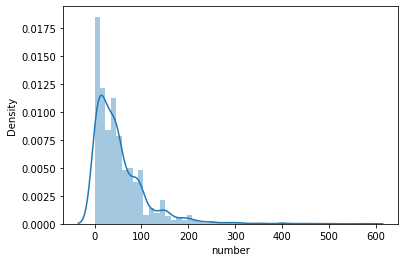

In [12]:
# просмотрим график распределения количества посадочных мест среди сетевых заведений
sns.distplot(chain_date['number']) 

In [13]:
#посмотрим на объекты с количеством посадочных мест боольше 100
chain_date.loc[chain_date['number']>100]

,id,object_name,chain,object_type,address,number
18,58565,Тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160
37,24968,Му-Му,да,кафе,"город Москва, улица Арбат, дом 4, строение 1",125
44,74979,Вареничная №1,да,кафе,"город Москва, улица Арбат, дом 29",120
53,21998,Му-Му,да,кафе,"город Москва, улица Арбат, дом 45/24",220
73,22366,МУ-МУ,да,кафе,"город Москва, Бауманская улица, дом 35/1",160
...,...,...,...,...,...,...
15088,79939,Хачапури,да,кафе,"город Москва, Кривоколенный переулок, дом 10, ...",120
15130,218415,Хинкальная,да,кафе,"город Москва, Новая площадь, дом 8, строение 2",136
15224,207911,KFC,да,предприятие быстрого обслуживания,"город Москва, Верхняя Радищевская улица, дом 22",115
15231,207593,KFC,да,ресторан,"город Москва, Волгоградский проспект, дом 32, ...",110


In [14]:
#просмотрим объекты с количеством посадочных мест меньше 5
chain_date.loc[chain_date['number']<6]

,id,object_name,chain,object_type,address,number
33,69243,Суши Wok,да,кафе,"город Москва, проспект Андропова, дом 30",4
164,128946,Суши Сет,да,магазин (отдел кулинарии),"город Москва, Вельяминовская улица, дом 6",3
213,25803,Сити Пицца,да,предприятие быстрого обслуживания,"город Москва, Ферганская улица, дом 12",4
242,133485,Суши Сет,да,магазин (отдел кулинарии),"город Москва, улица Героев Панфиловцев, дом 1,...",4
261,104191,Суши Вок,да,закусочная,"город Москва, Городецкая улица, дом 3",5
...,...,...,...,...,...,...
15335,211221,МИЛТИ,да,магазин (отдел кулинарии),"город Москва, Пятницкое шоссе, дом 3",0
15336,211209,Готовые блюда Милти,да,предприятие быстрого обслуживания,"город Москва, Ореховый бульвар, дом 22А",0
15337,208477,Милти,да,предприятие быстрого обслуживания,"город Москва, 3-й Крутицкий переулок, дом 18",0
15338,211201,Милти,да,магазин (отдел кулинарии),"город Москва, Новослободская улица, дом 4",0


In [15]:
# посмотрим на объекты с количеством посадочных мест равным 0
chain_date.loc[chain_date['number']==0]

,id,object_name,chain,object_type,address,number
290,144091,КОФЕ С СОБОЙ,да,предприятие быстрого обслуживания,"город Москва, 1-я Тверская-Ямская улица, дом 1...",0
498,152450,Суши сет,да,предприятие быстрого обслуживания,"город Москва, Краснопрудная улица, дом 22-24",0
504,157035,Кофе с собой,да,кафетерий,"город Москва, Краснохолмская набережная, дом 1...",0
577,149220,Кофейня «Кофе Хаус»,да,кафе,"город Москва, Павелецкая площадь, дом 1А, стро...",0
938,154596,СтардогS,да,предприятие быстрого обслуживания,"город Москва, Профсоюзная улица, дом 2/22",0
...,...,...,...,...,...,...
15334,211228,МИЛТИ,да,магазин (отдел кулинарии),"город Москва, Дубравная улица, дом 34/29",0
15335,211221,МИЛТИ,да,магазин (отдел кулинарии),"город Москва, Пятницкое шоссе, дом 3",0
15336,211209,Готовые блюда Милти,да,предприятие быстрого обслуживания,"город Москва, Ореховый бульвар, дом 22А",0
15337,208477,Милти,да,предприятие быстрого обслуживания,"город Москва, 3-й Крутицкий переулок, дом 18",0


Просмотрев сетевые объекты, стоит отметить большое количество объектов с небольшим количеством посадочных мест, в том числе с нулевым, это так называемые кофе с собой и магазины с отделами кулинарии (268 объектов)


In [16]:
# просмотрим количество объектов и среднее количество посадочных мест по сетевым объектам, исключая обекты из 1 заведения
chain_date_common=pd.pivot_table(chain_date, index='object_name', values=['id','number'], aggfunc={'id':'count', 'number':'median'}).reset_index()
chain_date_common=chain_date_common.loc[chain_date_common['id']>1]
display(chain_date_common)
#просмотрим квантили по данным
chain_date_common.describe()

,object_name,id,number
3,Bocconcino,3,68.0
6,Burger Club,3,20.0
7,COFIX,3,10.0
10,Coffeeshop Company,4,50.0
11,Cofix,22,8.5
...,...,...,...
702,Шоколадница,141,50.0
706,Штолле,12,25.5
708,ЯКИТОРИЯ,5,152.0
712,Якитория,33,98.0


,id,number
count,274.000000,274.000000
mean,9.189781,54.352190
std,19.502431,45.277118
min,2.000000,0.000000
25%,2.000000,20.000000
50%,3.000000,42.500000
75%,7.000000,80.000000
max,155.000000,245.000000


Сеть с большим количеством объектов будем считать сеть, имеющую больше 7 объектов, с маленьким количеством объектов - равные 2.
Сеть с большим средним количеством посадочных мест будем считать сеть, имеющую больше 80 посадочных мест, с маленьким количеством посадочных мест - меньше 20.


In [17]:
#  разбиваем сети на 4 группы  и смотрим в какой группе больше сетей.
chain_date_common1=chain_date_common.loc[(chain_date_common['id']>7) & (chain_date_common['number']>80)]
chain_date_common2=chain_date_common.loc[(chain_date_common['id']==2) & (chain_date_common['number']<20)]
chain_date_common3=chain_date_common.loc[(chain_date_common['id']==2) & (chain_date_common['number']>80)]
chain_date_common4=chain_date_common.loc[(chain_date_common['id']>7) & (chain_date_common['number']<20)]

date_compare=pd.DataFrame({"count": pd.Series([len(chain_date_common1.index), len(chain_date_common2.index), len(chain_date_common3.index), len(chain_date_common4.index)], index=['max_id, max_number', 'min_id, min_number', 'min_id, max_number', 'max_id, min_number'])})
display(date_compare)

,count
"max_id, max_number",13
"min_id, min_number",26
"min_id, max_number",25
"max_id, min_number",16


Анализируя данные отмечаем, что для сетевых заведений характерно мало заведений с большим количеством посадочных мест

In [18]:
#просмотрим среднее количество посадочных мест у различных типов заведений
median_number=pd.pivot_table(data, index='object_type', values='number', aggfunc='median').reset_index()

median_number.columns=['object_type', 'number']
median_number=median_number.sort_values(by='number',ascending=False)
display(median_number)


,object_type,number
8,столовая,103
7,ресторан,80
0,бар,35
1,буфет,32
3,кафе,30
4,кафетерий,6
6,предприятие быстрого обслуживания,5
2,закусочная,0
5,магазин (отдел кулинарии),0


Самое большое среднее количество посадочных мест у заведений типа столовых (103) и ресторанов(80). Отсутствуют посадочные места в закусочных и магазинов(отделы кулинарии)

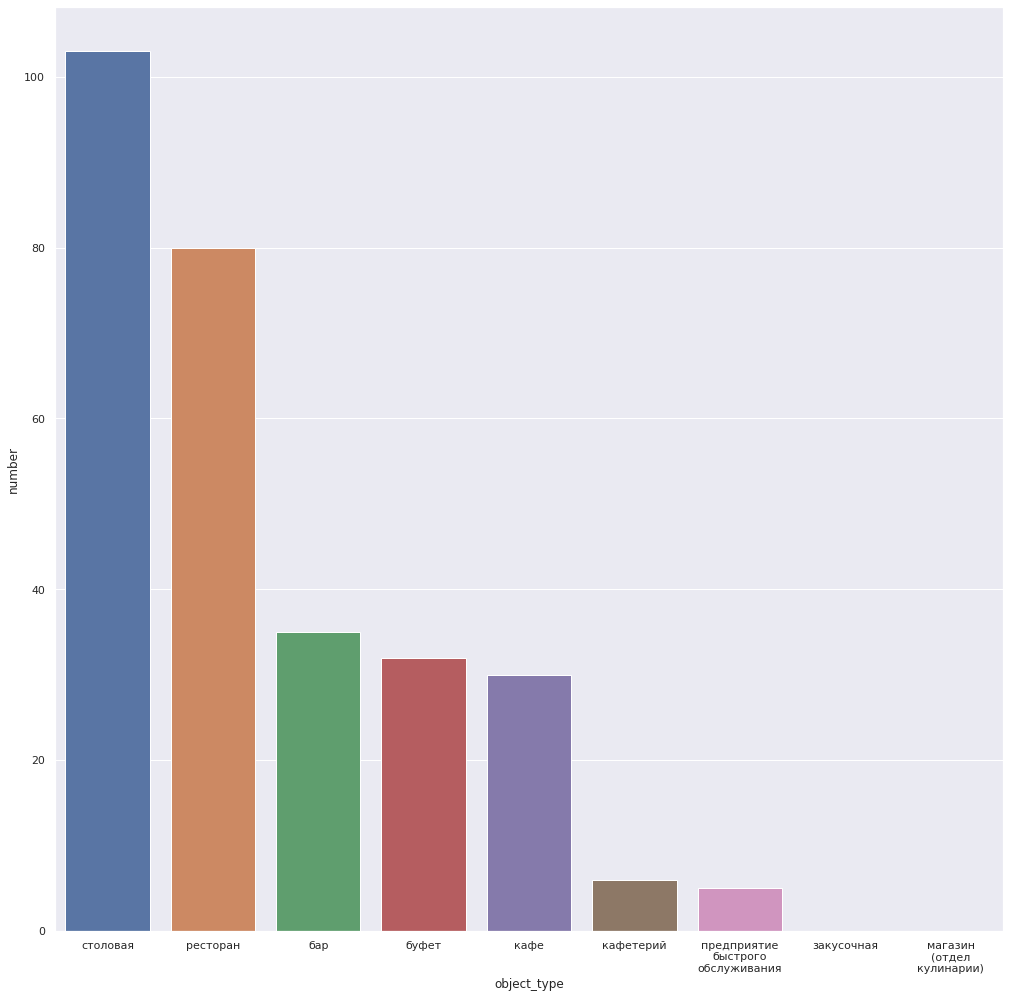

In [34]:
sns.barplot(x='object_type', y='number', data=median_number) 
sns.set(rc={'figure.figsize':(17,17)})

# Код ревьюера
old_ticks, old_labels = plt.xticks()

plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels]);


In [20]:
#  выделяем отдельный столбец с названием улиц
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

data["street"] = data["address"].str.extract(str_pat)
display(data)

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


In [22]:
#извлекаем данные только по городу Москва
data_moscow=data[data['address'].str.contains("город Москва")]
display(data_moscow)

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


In [23]:
#Просмотрим топ=10 улиц, на которых расположены заведения общепита, по городу Москва
street_moscow=data_moscow.groupby('street')['id'].count().sort_values(ascending=False).reset_index()
street_moscow.columns=['street', 'count_object']
top_street_moscow=street_moscow.head(10)
display(top_street_moscow)

,street,count_object
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,164
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'проспект Мира'),
  Text(1, 0, 'Профсоюзная улица'),
  Text(2, 0, 'Ленинградский проспект'),
  Text(3, 0, 'Пресненская набережная'),
  Text(4, 0, 'Варшавское шоссе'),
  Text(5, 0, 'Ленинский проспект'),
  Text(6, 0, 'проспект Вернадского'),
  Text(7, 0, 'Кутузовский проспект'),
  Text(8, 0, 'Каширское шоссе'),
  Text(9, 0, 'Кировоградская улица')])

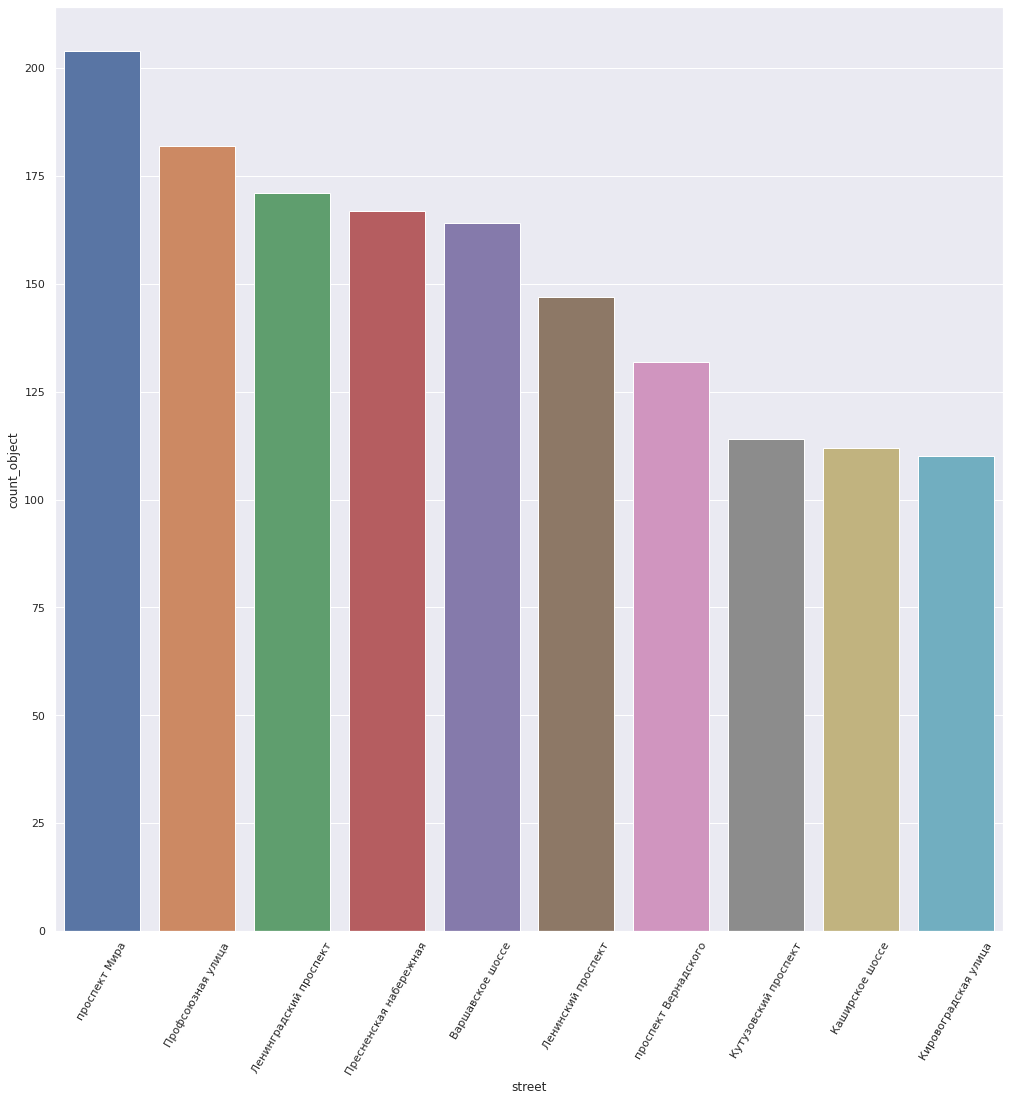

In [24]:
sns.barplot(x='street', y='count_object', data=top_street_moscow) 
plt.xticks(rotation=60)

In [25]:
#посмотрим в каких районах лежат самые популярные по количеству объектов общепита улицы 
moscow_region.query('streetname in @top_street_moscow.street').sort_values(by='streetname')

,streetname,areaid,okrug,area
3241,Варшавское шоссе,99,ЮАО,Донской район
4065,Варшавское шоссе,133,ЮЗАО,Район Южное Бутово
3125,Варшавское шоссе,110,ЮАО,Район Чертаново Южное
3999,Варшавское шоссе,130,ЮЗАО,Район Северное Бутово
3117,Варшавское шоссе,108,ЮАО,Район Чертаново Северное
3105,Варшавское шоссе,109,ЮАО,Район Чертаново Центральное
3349,Варшавское шоссе,104,ЮАО,Нагорный район
3305,Варшавское шоссе,102,ЮАО,Район Нагатино-Садовники
3308,Каширское шоссе,102,ЮАО,Район Нагатино-Садовники
3292,Каширское шоссе,101,ЮАО,Район Москворечье-Сабурово


Как видим, самые популярные улицы очень длинные и располагаются в разных районах города Москва. Таким образом сделать вывод, о лучшем районе трудно сделать.

In [26]:
#просмотрим улицы Москвы, на которых расположен только 1 объект
untop_street_moscow=street_moscow.loc[street_moscow['count_object']==1]
display(untop_street_moscow)

,street,count_object
1345,8-я улица Соколиной Горы,1
1346,улица Кошкина,1
1347,улица Константинова,1
1348,улица Инессы Арманд,1
1349,Андреево-Забелинская улица,1
...,...,...
1892,Зарайская улица,1
1893,Заводской проезд,1
1894,Юрловский проезд,1
1895,Жуков проезд,1


In [27]:
#посмотрим в каких районах лежат  улицы, на которых расположено по 1 объекту общепита 
one=moscow_region.query('streetname in @untop_street_moscow.street').sort_values(by='streetname')
one.groupby('area')['streetname'].count().sort_values(ascending=False).head(10)

area
Таганский район        27
Район Хамовники        26
Басманный район        25
Тверской район         20
Пресненский район      19
Район Марьина роща     18
Мещанский район        17
Район Арбат            17
Район Замоскворечье    14
Район Лефортово        12
Name: streetname, dtype: int64

In [28]:
#Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number', ylabel='Density'>

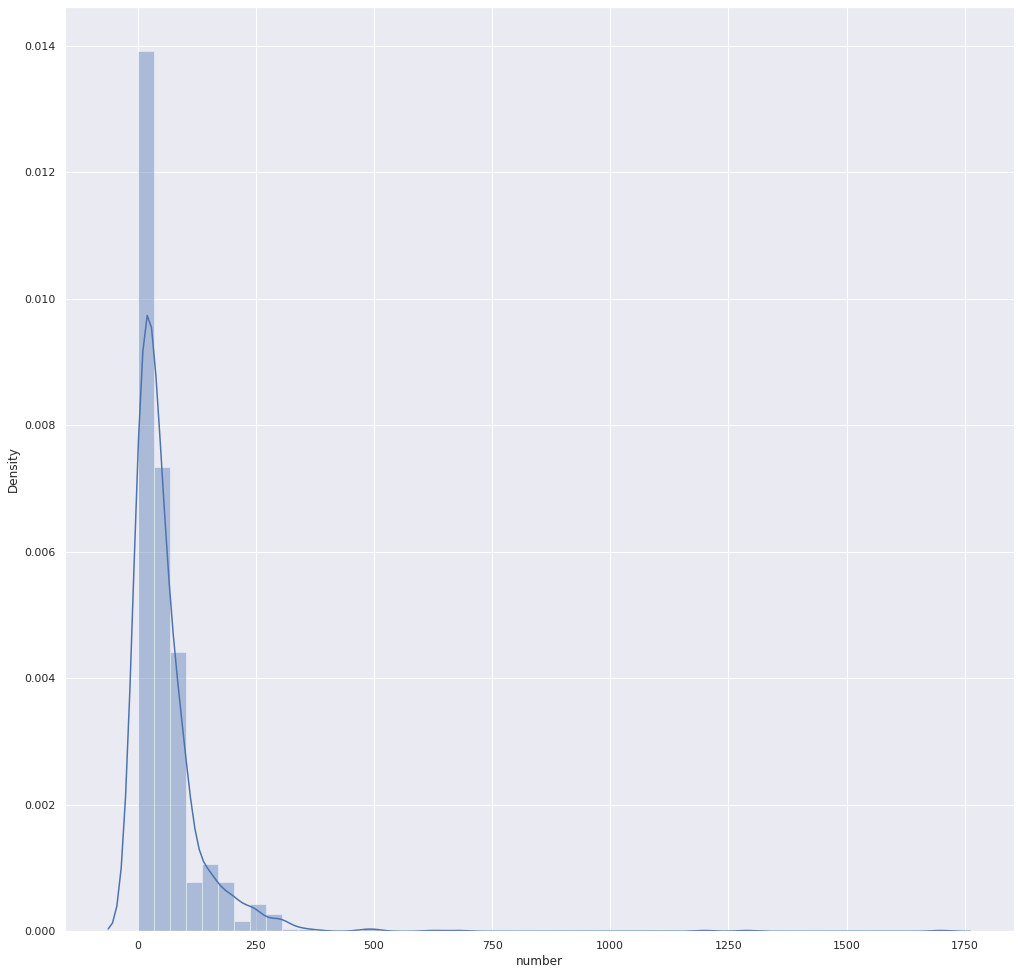

In [29]:
data_moscow_top=data_moscow.query('street in @top_street_moscow.street')
sns.distplot(data_moscow_top['number']) 

In [30]:
display(data_moscow_top)

,id,object_name,chain,object_type,address,number,street
151,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,Кафе «Subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,Кафе «Ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,Выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе
...,...,...,...,...,...,...,...
15308,213629,ДОДО пицца,да,кафе,"город Москва, Пресненская набережная, дом 12",25,Пресненская набережная
15325,198436,Милти,да,предприятие быстрого обслуживания,"город Москва, Ленинградский проспект, дом 80, ...",0,Ленинградский проспект
15347,222491,Кальянная «Мята Lounge»,да,кафе,"город Москва, Профсоюзная улица, дом 142, корп...",40,Профсоюзная улица
15350,213061,Мята,да,кафетерий,"город Москва, Каширское шоссе, дом 96, корпус 1",35,Каширское шоссе


In [31]:
data_moscow_top.loc[data_moscow_top['number']==0]

,id,object_name,chain,object_type,address,number,street
154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
582,80848,Шаурма,нет,предприятие быстрого обслуживания,"город Москва, Ленинский проспект, дом 2А",0,Ленинский проспект
702,153638,Босс-кулинария,нет,магазин (отдел кулинарии),"город Москва, проспект Мира, дом 114Б",0,проспект Мира
938,154596,СтардогS,да,предприятие быстрого обслуживания,"город Москва, Профсоюзная улица, дом 2/22",0,Профсоюзная улица
1709,154848,«ИП» Шацкая Е.М,нет,предприятие быстрого обслуживания,"город Москва, Профсоюзная улица, дом 25, корпус 1",0,Профсоюзная улица
...,...,...,...,...,...,...,...
15263,211466,Милти,да,предприятие быстрого обслуживания,"город Москва, Ленинградский проспект, дом 31А,...",0,Ленинградский проспект
15266,211232,Предприятие быстрого обслуживания «Милти»,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 14",0,Кировоградская улица
15292,218390,Милти,да,закусочная,"город Москва, Кутузовский проспект, дом 36, ст...",0,Кутузовский проспект
15293,218439,Милти,да,закусочная,"город Москва, Кутузовский проспект, дом 36, ст...",0,Кутузовский проспект


In [32]:
data_moscow_top.loc[data_moscow_top['number']<20]

,id,object_name,chain,object_type,address,number,street
154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,Выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе
166,148853,Кафе контдитерская Кузина,нет,кафе,"город Москва, проспект Вернадского, дом 11/19",5,проспект Вернадского
167,149149,Суши WoK,да,кафе,"город Москва, проспект Вернадского, дом 11/19",8,проспект Вернадского
168,128511,Аморе,нет,кафе,"город Москва, проспект Вернадского, дом 11/19",10,проспект Вернадского
...,...,...,...,...,...,...,...
15266,211232,Предприятие быстрого обслуживания «Милти»,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 14",0,Кировоградская улица
15270,205523,Милти,да,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 26, строен...",2,Варшавское шоссе
15292,218390,Милти,да,закусочная,"город Москва, Кутузовский проспект, дом 36, ст...",0,Кутузовский проспект
15293,218439,Милти,да,закусочная,"город Москва, Кутузовский проспект, дом 36, ст...",0,Кутузовский проспект


Анализируя количество посадочных мест в заведениях на самых популярных улицах Москвы, можно сделать вывод, что практически 1/3 заведений имеет количество посадочных мест меньше 20, в том числе 164 объекта (10 процентов) вообще не имеют посадочных мест.

## Общий вывод

Анализируя данные об объектах общественного питания, получаем следующие выводы:

    - Самыми популярными видами объектов общественного питания является кафе, за ним столовая, ресторан и предприятие быстрого обслуживания.
    - Большинство объектов не являются сетевыми.
    - В первую очередь для предприятий быстрого обслуживания характерно сетевое обслуживание, а также для отделов кулинарии.
    - Для сетевых заведений характерно мало заведений с большим количеством посадочных мест
    - Самое большое среднее количество посадочных мест у заведений типа столовых (103) и ресторанов(80). Отсутствуют посадочные места в закусочных и магазинов(отделы кулинарии)
    - В тройку самых популярных улиц города Москва для размещения объектов общепита являются проспект Мира, Профсоюзная улица, Ленинградский проспект. Однако выделить отдельный популярный район нет возможности, так как улицы очень длинные и пересекают несколько районов.
    - Самыми непопулярными районами можно назвать  Таганский район, район Хамовники, Басманный район
    - Анализируя количество посадочных мест в заведениях на самых популярных улицах Москвы, можно сделать вывод, что практически 1/3 заведений имеет количество посадочных мест меньше 20, в том числе 164 объекта (10 процентов) вообще не имеют посадочных мест.
    

Рекомендации заказчику:

Для реализации проекта по открытию робот-кафе следует рассмотреть возможность открытия такого типа общественного объекта как кафе, возможно столовая, но с небольним количеством посадочных мест. Для размещения кафе обратить внимание на такие улицы как проспект Мира, Профсоюзная улица, Ленинградский проспект. Не учитывать в размещении Таганский район, район Хамовники, Басманный район.